<a href="https://colab.research.google.com/github/gridyf/Projeto_2-Teste-de-Hipoteses/blob/main/TestedeHipoteses_IngridFerreira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de hipóteses

# **# Analisando os dados para entender se a distribuição é paramétrica**

In [1]:
import pandas as pd
from scipy import stats
df1 = pd.read_csv('/content/Table_tech_geral.csv')
#Limpeza dos dados
df1 = df1[~df1['stream_int'].isnull()]
df1[['stream_int']] = df1[['stream_int']].astype(int)
#Selecionando colunas desejadas
df=df1[['stream_int','bpm','danceability__','valence__','energy__','acousticness__','instrumentalness__','liveness__','speechiness__']]
for coluna in df.columns:
    # Shapiro-Wilk
    stat, p_valor = stats.shapiro(df[coluna])

    print(f"Para a coluna '{coluna}':")
    print("Estatística do teste:", stat)
    print("Valor p:", p_valor)
    print()

Para a coluna 'stream_int':
Estatística do teste: 0.7621867656707764
Valor p: 6.138221426296524e-35

Para a coluna 'bpm':
Estatística do teste: 0.9778462648391724
Valor p: 7.311414668143001e-11

Para a coluna 'danceability__':
Estatística do teste: 0.9792888164520264
Valor p: 2.148386329947627e-10

Para a coluna 'valence__':
Estatística do teste: 0.9771147966384888
Valor p: 4.304694101175954e-11

Para a coluna 'energy__':
Estatística do teste: 0.9803265929222107
Valor p: 4.803906161754412e-10

Para a coluna 'acousticness__':
Estatística do teste: 0.8734274506568909
Valor p: 4.249792452395851e-27

Para a coluna 'instrumentalness__':
Estatística do teste: 0.18831443786621094
Valor p: 0.0

Para a coluna 'liveness__':
Estatística do teste: 0.7726841568946838
Valor p: 2.421568183450578e-34

Para a coluna 'speechiness__':
Estatística do teste: 0.7157934904098511
Valor p: 2.4132729431636216e-37



Conclusão: Após análise do teste acima, baseado no valor de p, podemos inferir que a hipótese nula (os dados têm distribuição normal) deve ser rejeitada, portanto, estamos diante de uma distribuição não paramétrica.Sendo assim, o teste a ser aplicado nos dados é o de Mann-Whitney.

# **# Organizando a visualização do teste Shapiro**

In [2]:
import pandas as pd
from scipy.stats import shapiro
from tabulate import tabulate
from tabulate import tabulate
hipoteses=[]
cabecalho= ['Variavel','Estatistica do teste','P-Valor']
for variavel in df:
    stat, p_valor = shapiro(df[variavel].dropna())
    hipoteses.append({'Variável': variavel, 'Estatística de teste': stat, 'P-Valor': p_valor})

df_Hipoteses = pd.DataFrame(hipoteses)
tabela = tabulate(df_Hipoteses, headers=cabecalho, tablefmt='plain', showindex=False,numalign="center", stralign="center")
print(tabela)

     Variavel        Estatistica do teste     P-Valor
    stream_int             0.762187         6.13822e-35
       bpm                 0.977846         7.31141e-11
  danceability__           0.979289         2.14839e-10
    valence__              0.977115         4.30469e-11
     energy__              0.980327         4.80391e-10
  acousticness__           0.873427         4.24979e-27
instrumentalness__         0.188314              0
    liveness__             0.772684         2.42157e-34
  speechiness__            0.715793         2.41327e-37


# **# Aplicando o teste Mann-Whitney**

In [3]:
import pandas as pd
from scipy import stats
df1 = pd.read_csv('/content/Table_tech_geral.csv')
#Limpeza dos dados
df2 = df1[~df1['stream_int'].isnull()]
df2[['stream_int']] = df2[['stream_int']].astype(int)
import pandas as pd
from scipy import stats

variaveis=['bpm','danceability__','valence__','energy__','acousticness__','instrumentalness__','liveness__','speechiness__']

# Lista para armazenar os resultados
resultado = []

# Filtrando apenas os dados onde a categoria é 'alto'
for variavel in variaveis:
    alto = df2[df2['categoria'] == 'alto'][variavel]
    baixo = df2[df2['categoria'] == 'baixo'][variavel]
    stat, p_valor = stats.mannwhitneyu(alto, baixo)
    resultado.append({'Variável': variavel,
                    'Estatística U': stat,
                    'Valor p': p_valor})

# Criando um DataFrame a partir dos resultados
resultado_df = pd.DataFrame(resultado)

# Exibindo o DataFrame
print(resultado_df)


             Variável  Estatística U   Valor p
0                 bpm        81776.5  0.335608
1      danceability__        75058.0  0.005311
2           valence__        78030.0  0.047695
3            energy__        84061.5  0.732033
4      acousticness__        81441.0  0.291795
5  instrumentalness__        85002.0  0.861018
6          liveness__        81949.5  0.358914
7       speechiness__        73236.5  0.000952


<ipython-input-3-84388d18c89d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['stream_int']] = df2[['stream_int']].astype(int)


Conclusão: Tendo em vista que o valor de p nos diz a probabilidade da hipótese nula ser verdadeira (h0= distribuição dos dados de sucesso e características da música não são diferentes), observa-se que para todas as características temos a hipótese nula aceita, ou seja, a distruibuição dos dados não sçao diferentes e,portanto,não há relação entre o sucesso e suas características. Entretando, para "speechiness","danceability","valence", h0 é rejeitada,levando-nos a inferir que há diferença entre suas distribuições

*De forma a embasar as decisões tomadas na análise, faz-se necessário visualização da distribuição dos dados. A seguir, os histogramas de cada características dentro das categorias "alto" e "baixo" foram plotadas.*

<ipython-input-5-245a18a89e20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['stream_int']] = df2[['stream_int']].astype(int)


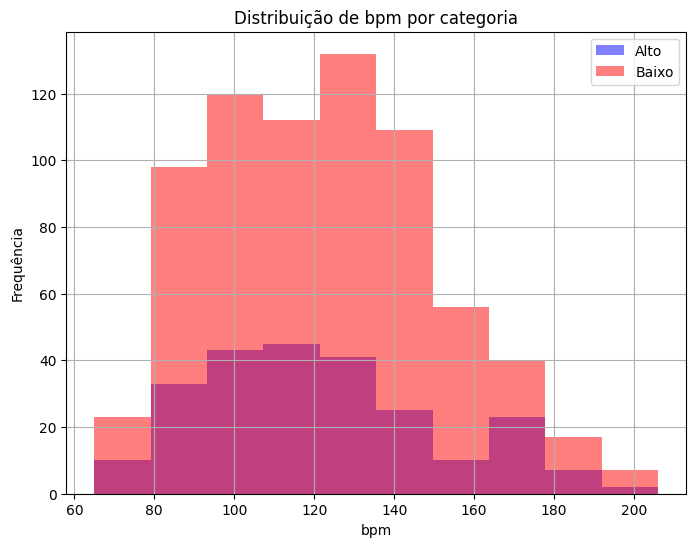

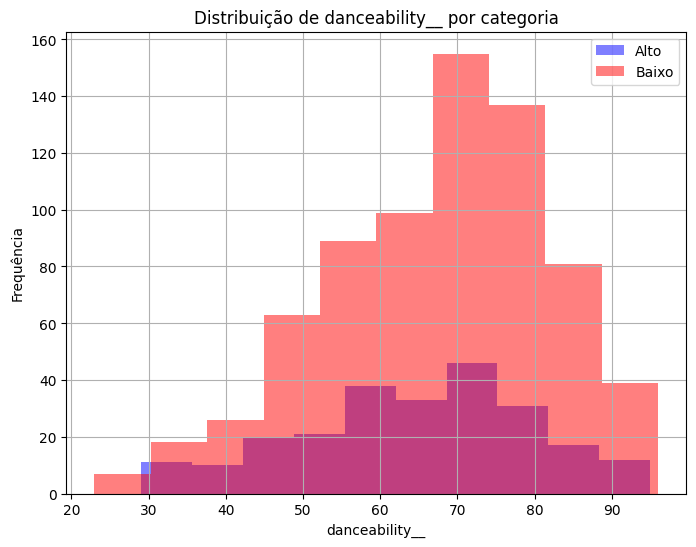

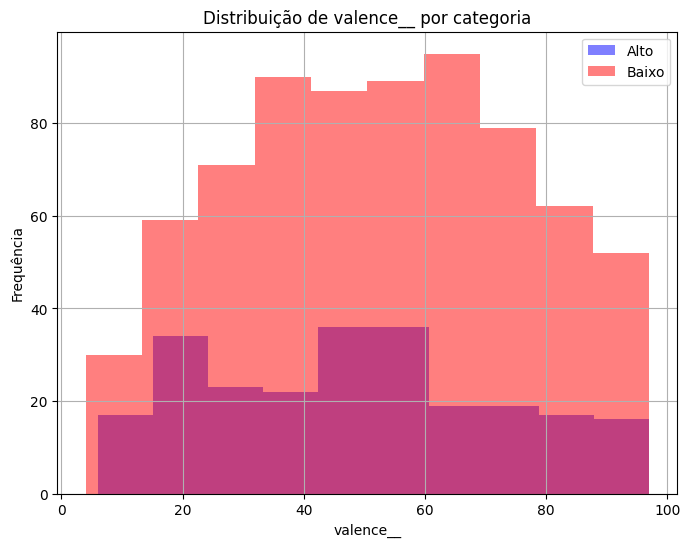

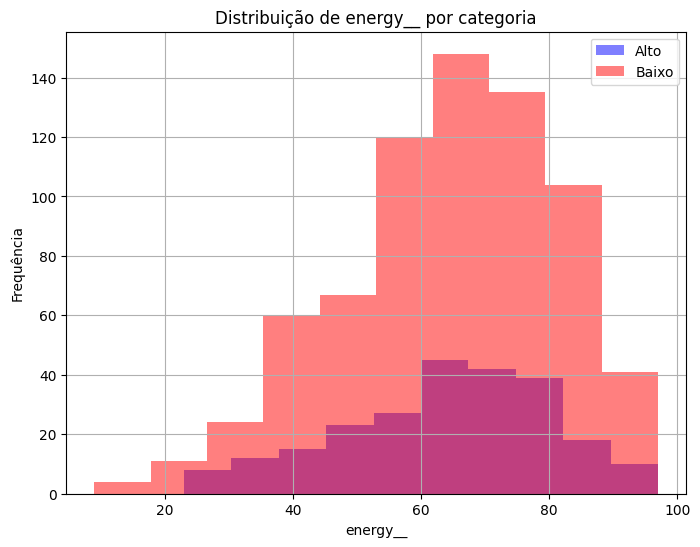

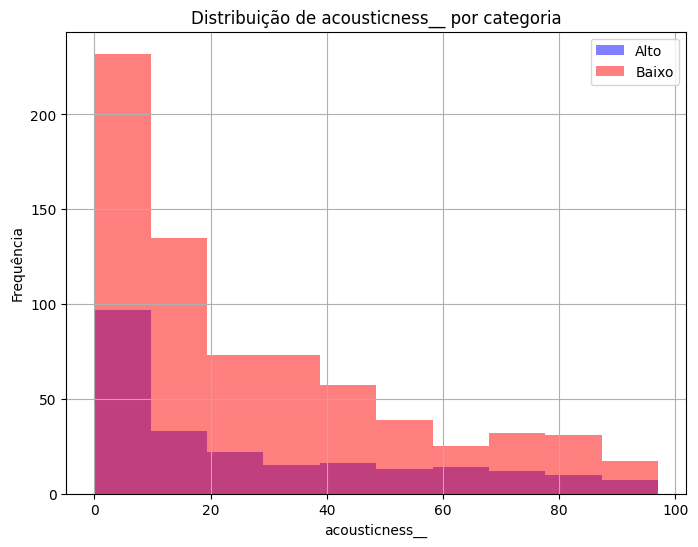

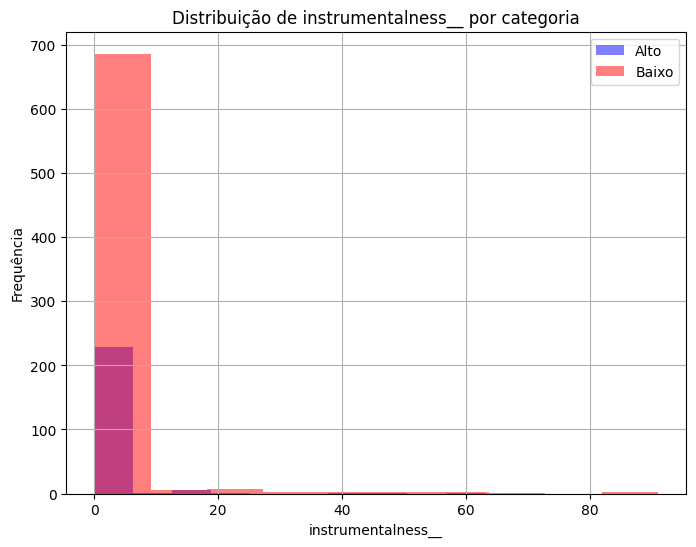

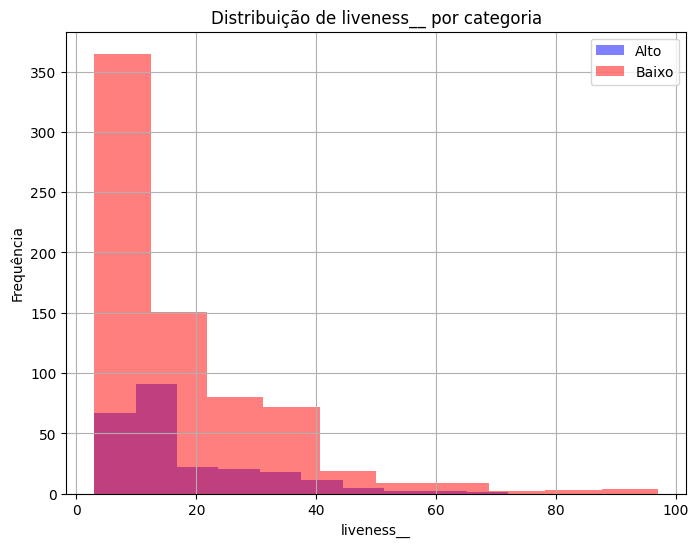

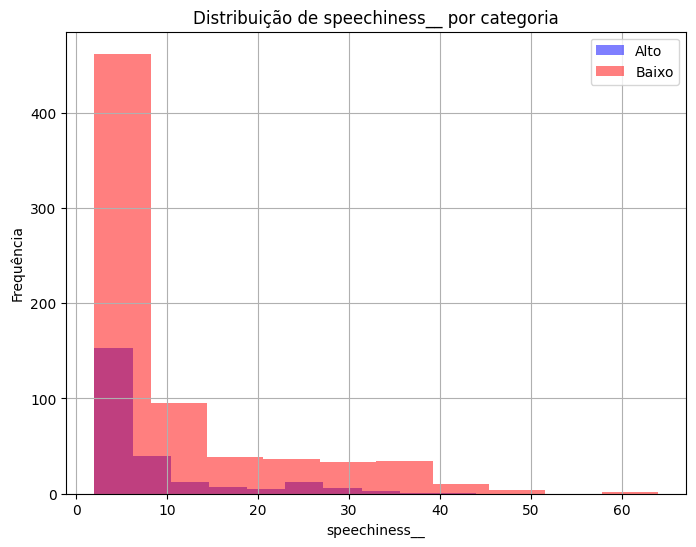

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('/content/Table_tech_geral.csv')
df2 = df1[~df1['stream_int'].isnull()]
df2[['stream_int']] = df2[['stream_int']].astype(int)
variaveis = ['bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']
# Hitograma
for variavel in variaveis:
    plt.figure(figsize=(8, 6))
    plt.hist(df2[df2['categoria'] == 'alto'][variavel], alpha=0.5, label='Alto', color='blue')  # Histograma para categoria 'alto'
    plt.hist(df2[df2['categoria'] == 'baixo'][variavel], alpha=0.5, label='Baixo', color='red')  # Histograma para categoria 'baixo'
    plt.title(f'Distribuição de {variavel} por categoria')
    plt.xlabel(variavel)
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True)
    plt.show()

<ipython-input-6-195c29335110>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['stream_int']] = df2[['stream_int']].astype(int)


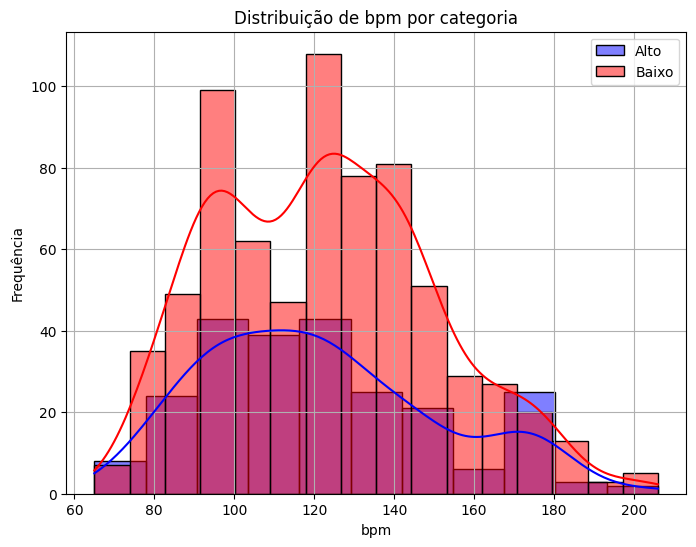

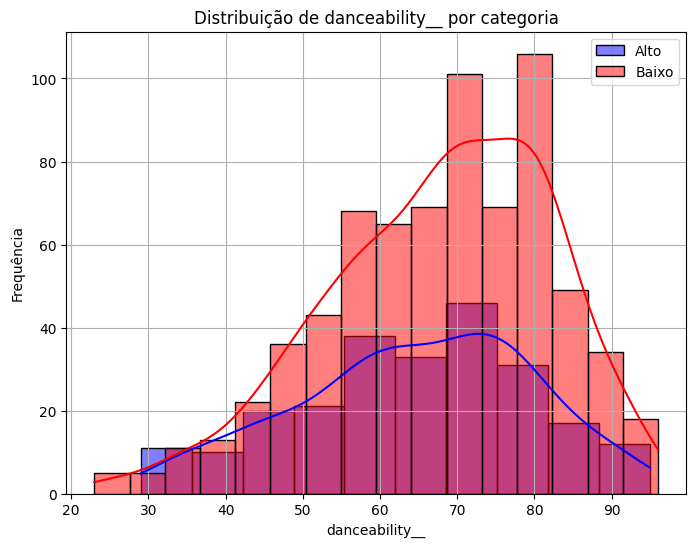

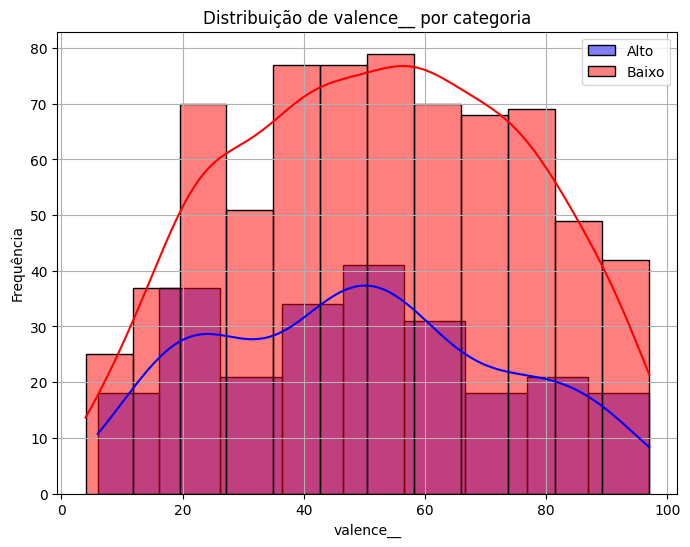

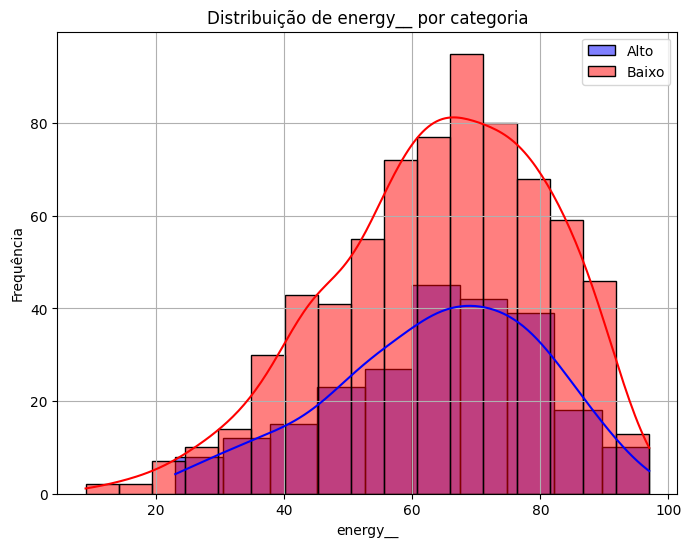

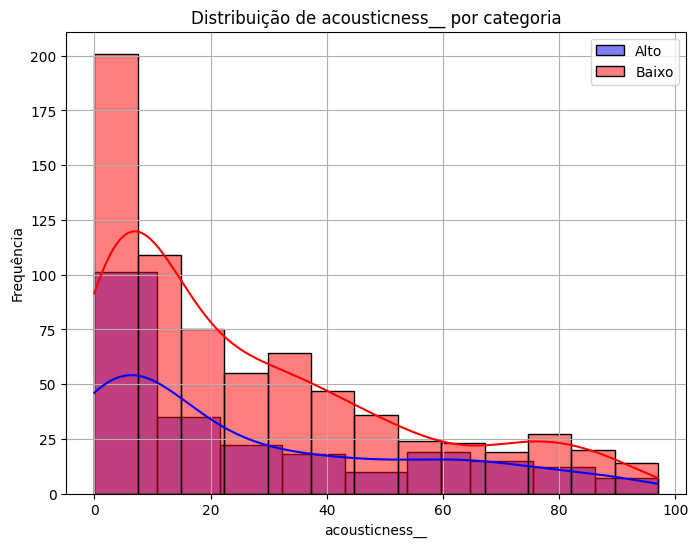

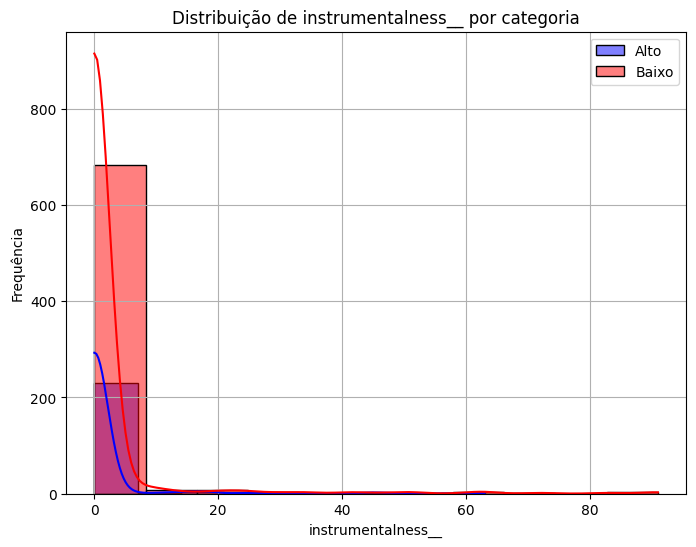

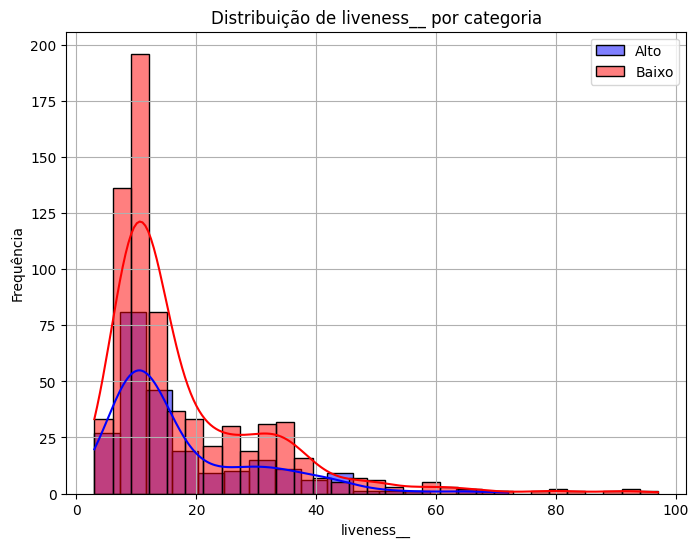

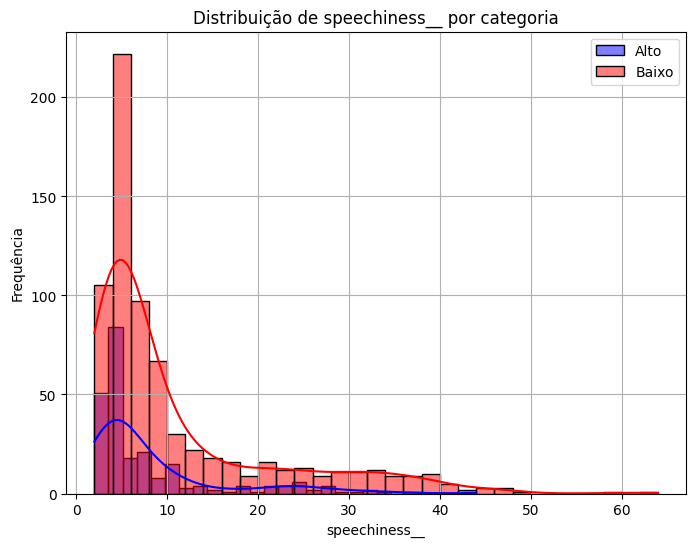

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('/content/Table_tech_geral.csv')
df2 = df1[~df1['stream_int'].isnull()]
df2[['stream_int']] = df2[['stream_int']].astype(int)
variaveis = ['bpm', 'danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']
for variavel in variaveis:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[df2['categoria'] == 'alto'][variavel], alpha=0.5, label='Alto', color='blue', kde=True)  # Histograma com curva KDE para categoria 'alto'
    sns.histplot(df2[df2['categoria'] == 'baixo'][variavel], alpha=0.5, label='Baixo', color='red', kde=True)  # Histograma com curva KDE para categoria 'baixo'
    plt.title(f'Distribuição de {variavel} por categoria')
    plt.xlabel(variavel)
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True)
    plt.show()

# **# Resumo dos dados**

In [ ]:
df=df1[['stream_int','bpm','danceability__','valence__','energy__','acousticness__','instrumentalness__','liveness__','speechiness__']]

df = df[~df['stream_int'].isnull()]
df.describe()

,stream_int,bpm,danceability__,valence__,energy__,acousticness__,instrumentalness__,liveness__,speechiness__
count,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,5.150209e+08,122.469045,66.932844,51.435467,64.209864,27.279119,1.579224,18.247639,10.161595
std,5.674667e+08,28.094366,14.678763,23.523461,16.630501,26.055043,8.409945,13.731961,9.940639
min,2.762000e+03,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.420953e+08,99.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,2.902286e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,6.738011e+08,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# #1 Músicas com BPM alto fazem mais sucessos em termos de streams no sporitfy ?


Bpm alto:
7      119
11     140
17     116
21      80
22     102
      ... 
766     94
773    132
867    122
869    118
923    148
Name: bpm, Length: 239, dtype: int64'
Stream das músicas que tem bpm alto:
7       741301563
11      769213520
17     1145727611
21      838586769
22     2009094673
          ...    
766     751134527
773     681583126
867     721975598
869    1316855716
923     725980112
Name: stream_int, Length: 239, dtype: int64'


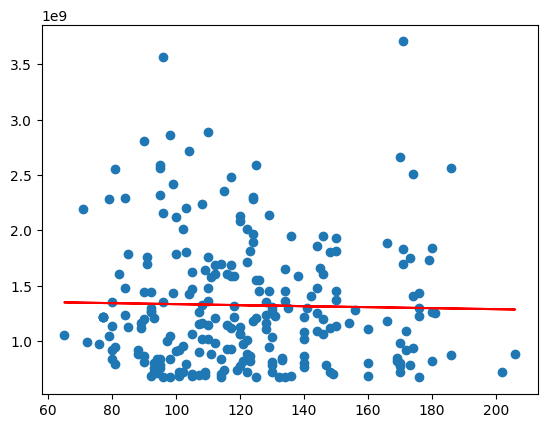

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import pandas as pd
from scipy import stats
dfr = pd.read_csv('/content/Table_tech_geral.csv')
dfr = dfr[~dfr['stream_int'].isnull()]
dfr[['stream_int']] = dfr[['stream_int']].astype(int)
from scipy.stats import pearsonr, linregress
#Stream das músicas que têm bpm alto
stream_bpmalto = dfr[["stream_int","categoria"]].query("categoria == 'alto'")["stream_int"]
#Bpm das músicas que estão na categoria "alto"
bpm_alto= dfr[["bpm","categoria"]].query("categoria == 'alto'")["bpm"]
print(f"Bpm alto:\n{bpm_alto}'")
print(f"Stream das músicas que tem bpm alto:\n{stream_bpmalto}'")
X_bpmAlto = bpm_alto.values.reshape(-1,1)
Y_stream = stream_bpmalto.values.reshape(-1,1)
reg=LinearRegression()
reg.fit(X_bpmAlto,Y_stream)
angular=reg.coef_
linear=reg.intercept_
plt.scatter(X_bpmAlto,Y_stream)
plt.plot(X_bpmAlto,linear + angular * X_bpmAlto, color="red")
plt.show()





In [ ]:
#Stream das músicas que têm bpm alto
stream_bpmalto = dfr[["stream_int","categoria"]].query("categoria == 'alto'")["stream_int"]
#Bpm das músicas que estão na categoria "alto"
bpm_alto= dfr[["bpm","categoria"]].query("categoria == 'alto'")["bpm"]
print(f"Bpm alto:\n{bpm_alto}'")
print(f"Stream das músicas que tem bpm alto:\n{stream_bpmalto}'")
r= pearsonr(bpm_alto,stream_bpmalto)
print(f'coeficiente de relação {r}')

Bpm alto:
7      119
11     140
17     116
21      80
22     102
      ... 
766     94
773    132
867    122
869    118
923    148
Name: bpm, Length: 239, dtype: int64'
Stream das músicas que tem bpm alto:
7       741301563
11      769213520
17     1145727611
21      838586769
22     2009094673
          ...    
766     751134527
773     681583126
867     721975598
869    1316855716
923     725980112
Name: stream_int, Length: 239, dtype: int64'
coeficiente de relação PearsonRResult(statistic=-0.023259637923283182, pvalue=0.7205315590019776)


Conclusão: Baseado no gráfico de dispersão e no coeficiente de pearson, conclui-se que a hipótese nula pode ser aceita, indicando que não há relação entre as variáveis estudadas e, portanto, indiciando-nos que o sucesso de  músicas com BPM altos não estão linearmente atrelados.

# #2 As músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas como Deezer

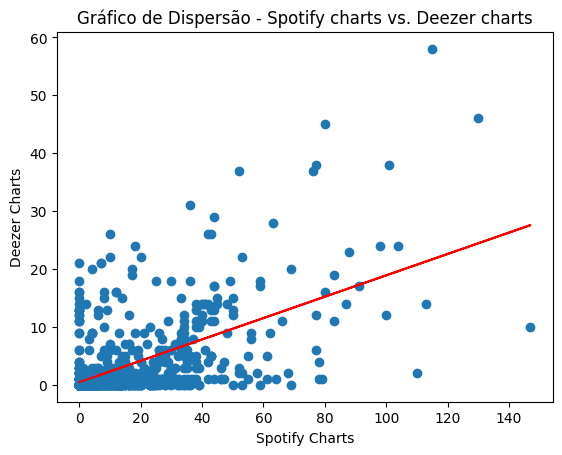

Coeficiente de correlação entre charts do spotify e charts do deezer:
 PearsonRResult(statistic=0.5956195017818057, pvalue=1.4407293990423798e-92)


In [ ]:
import pandas as pd
from scipy import stats
tGeral= pd.read_csv('/content/track_geral.csv')
tGeral = tGeral[~tGeral['stream_int'].isnull()]
tGeral[['stream_int']] = tGeral[['stream_int']].astype(int)
x_spotify= tGeral[["spotify_CHA"]].to_numpy()
x_stream=tGeral[["stream_int"]].to_numpy()
y_deezer=tGeral[["in_deezer_charts"]].to_numpy()
y_apple=tGeral[["in_apple_charts"]]
y_total_playlist=tGeral[["total_playlist"]]
#Regressão Linear  Spotify x Deezer
reg=LinearRegression()
reg.fit(x_spotify,y_deezer)
angular=reg.coef_
linear=reg.intercept_
plt.scatter(x_spotify,y_deezer)
#Plotagem do gráfico
plt.plot(x_spotify,linear + angular * x_spotify, color="red")
plt.title('Gráfico de Dispersão - Spotify charts vs. Deezer charts')
plt.xlabel('Spotify Charts')
plt.ylabel('Deezer Charts')
plt.show()
#Correlação
r = pearsonr(tGeral["spotify_CHA"].values,tGeral["in_deezer_charts"].values)
print(f'Coeficiente de correlação entre charts do spotify e charts do deezer:\n {r}')


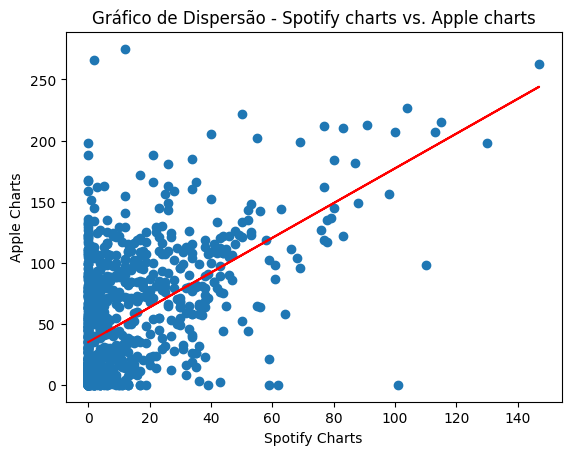

Coeficiente de correlação entre charts do spotify e charts do apple:
 PearsonRResult(statistic=0.5505056040665309, pvalue=1.2924128984308326e-76)


In [ ]:
#Regressão Linear  Spotify x Apple
reg=LinearRegression()
reg.fit(x_spotify,y_apple)
angular=reg.coef_
linear=reg.intercept_
plt.scatter(x_spotify,y_apple)
#Plotagem do gráfico
plt.plot(x_spotify,linear + angular * x_spotify, color="red")
plt.title('Gráfico de Dispersão - Spotify charts vs. Apple charts')
plt.xlabel('Spotify Charts')
plt.ylabel('Apple Charts')
plt.show()
#Correlação
r = pearsonr(tGeral["spotify_CHA"].values,tGeral["in_apple_charts"].values)
print(f'Coeficiente de correlação entre charts do spotify e charts do apple:\n {r}')

Conclusão: A partir das análises realizadas acima, observa-se que para o caso entre spotify e deezer, há uma correlação moderada positiva, pois o p-valor é  zero, indicando que podemos rejeitar a hipótese nula(h0= não há relação entre as variáveis).Entre spotify e apple, também vemos uma correlação modearada positiva, assim como um p-valor que nos permite rejeitar a hipótese nula, concluindo, portanto, que a hipótese alternativa deve ser aceita.

# #3 A presença de uma música em um maior número de playlists está relacionada com um maior número de streams.

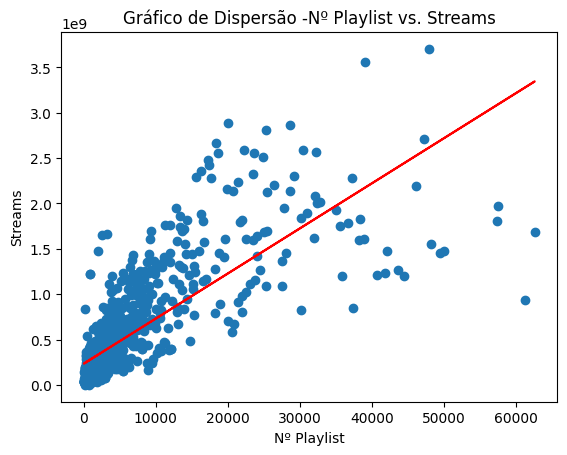

Coeficiente de correlação entre Nº Playlist e Streams:
 PearsonRResult(statistic=0.7810344395558371, pvalue=1.1565399827369551e-196)


In [ ]:
import pandas as pd
from scipy import stats
tGeral = tGeral[~tGeral['stream_int'].isnull()]
tGeral[['stream_int']] = tGeral[['stream_int']].astype(int)
y_stream=tGeral[["stream_int"]].to_numpy()
x_total_playlist=tGeral[["total_playlist"]].to_numpy()
#Regressão Linear  maior nº de playlist x streams
reg=LinearRegression()
reg.fit(x_total_playlist,y_stream)
angular=reg.coef_
linear=reg.intercept_
plt.scatter(x_total_playlist,y_stream)
#Plotagem do gráfico
plt.plot(x_total_playlist,linear + angular * x_total_playlist, color="red")
plt.title('Gráfico de Dispersão -Nº Playlist vs. Streams')
plt.xlabel('Nº Playlist')
plt.ylabel('Streams')
plt.show()
#Correlação
r = pearsonr(tGeral["total_playlist"].values,tGeral["stream_int"].values)
print(f'Coeficiente de correlação entre Nº Playlist e Streams:\n {r}')



Conclusão: A partir da análise feita,tendo em vista o coeficiente  de relação e o valor p associado a ele, conclui-se que a hipótese nula pode ser rejeitada, garantindo que há uma relação *forte* entre a presença das músicas em playlist e o seu sucesso.

# #4 Artistas com maior número de músicas no Spotify têm mais streams.

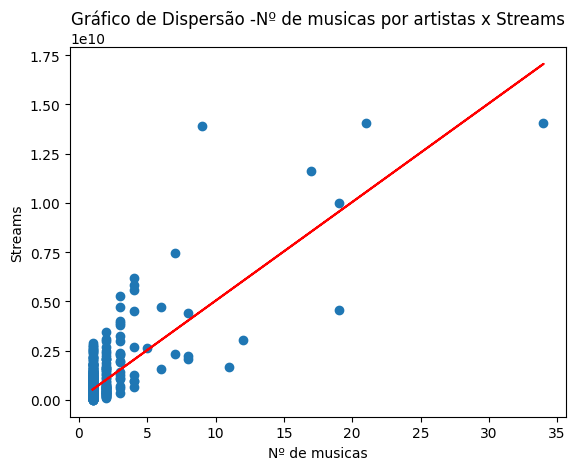

Coeficiente de correlação entre nº de músicas por artistas e streams:
 PearsonRResult(statistic=0.7766272845793392, pvalue=9.2781922397743e-131)


In [ ]:
#Agrupar dados por quantidade de músicas por artistas
musicasGeral = tGeral.groupby('name_artist_').agg({'trackid': 'nunique', 'stream_int': 'sum'})
y_stream=musicasGeral[["stream_int"]].to_numpy()
x_qtd_musicas=musicasGeral[["trackid"]].to_numpy()
#Regressão Linear  nº de musicas por artistas x streams
reg=LinearRegression()
reg.fit(x_qtd_musicas,y_stream)
angular=reg.coef_
linear=reg.intercept_
plt.scatter(x_qtd_musicas,y_stream)
#Plotagem do gráfico
plt.plot(x_qtd_musicas,linear + angular * x_qtd_musicas, color="red")
plt.title('Gráfico de Dispersão -Nº de musicas por artistas x Streams')
plt.xlabel('Nº de musicas')
plt.ylabel('Streams')
plt.show()
#Correlação
r = pearsonr(musicasGeral["trackid"].values,musicasGeral["stream_int"].values)
print(f'Coeficiente de correlação entre nº de músicas por artistas e streams:\n {r}')




Conclusão: Após análise dos dados expostos, percebe-se que a hipótese nula pode ser rejeitada e, portanto, pode-se aceitar a hipótese alternativa de que há relação entre a quantidade de músicas e seu sucesso.

# #5 As características da música influenciam o sucesso em termos de streams no Spotify.

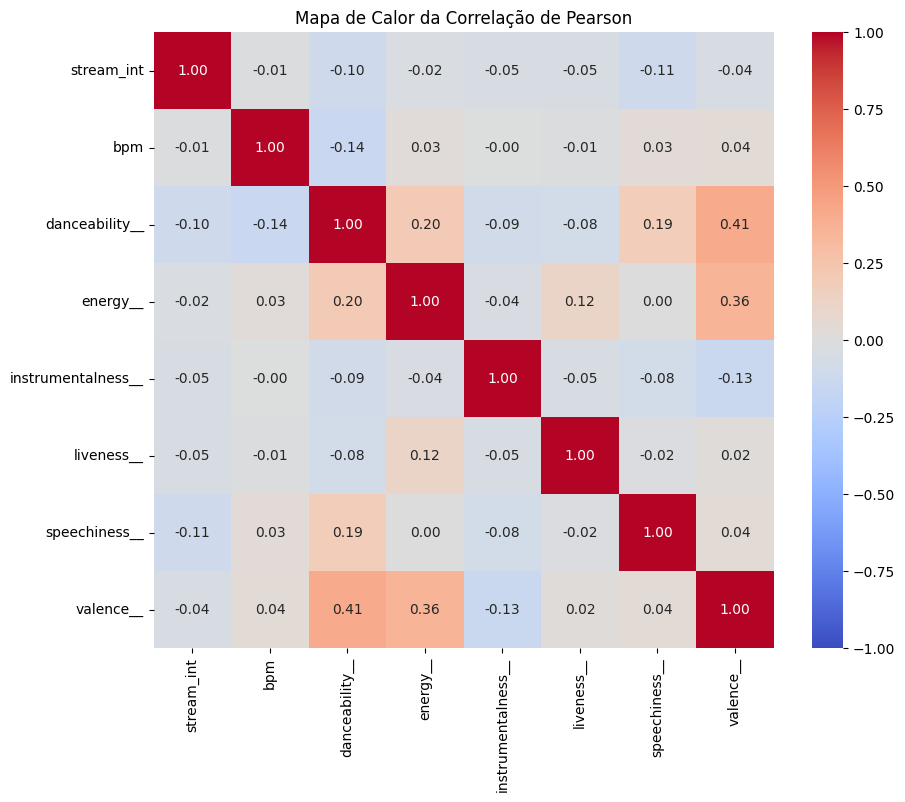

In [ ]:
dfc = pd.read_csv('/content/Table_tech_geral.csv')
dfc = dfc[~dfc['stream_int'].isnull()]
dfc[['stream_int']] = dfc[['stream_int']].astype(int)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converta os dados do Power BI para um DataFrame do Pandas
# Calcule a matriz de correlação de Pearson
atributos=['stream_int','bpm','danceability__','energy__','instrumentalness__','liveness__','speechiness__','valence__']
correlation_matrix = dfc[atributos].corr(method='pearson')

# Crie um mapa de calor usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor da Correlação de Pearson')
plt.show()

**Conclusão:** A partir da matriz de correlação, pode-se perceber que correlação estudada varia entre nula e fraca, corroborando a análise feita com as segmentações "alto" e "baixo" para streams.